# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Your code here
# from google.colab import files
# uploaded = files.upload()


In [2]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_all_all.csv')
data.head()

,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

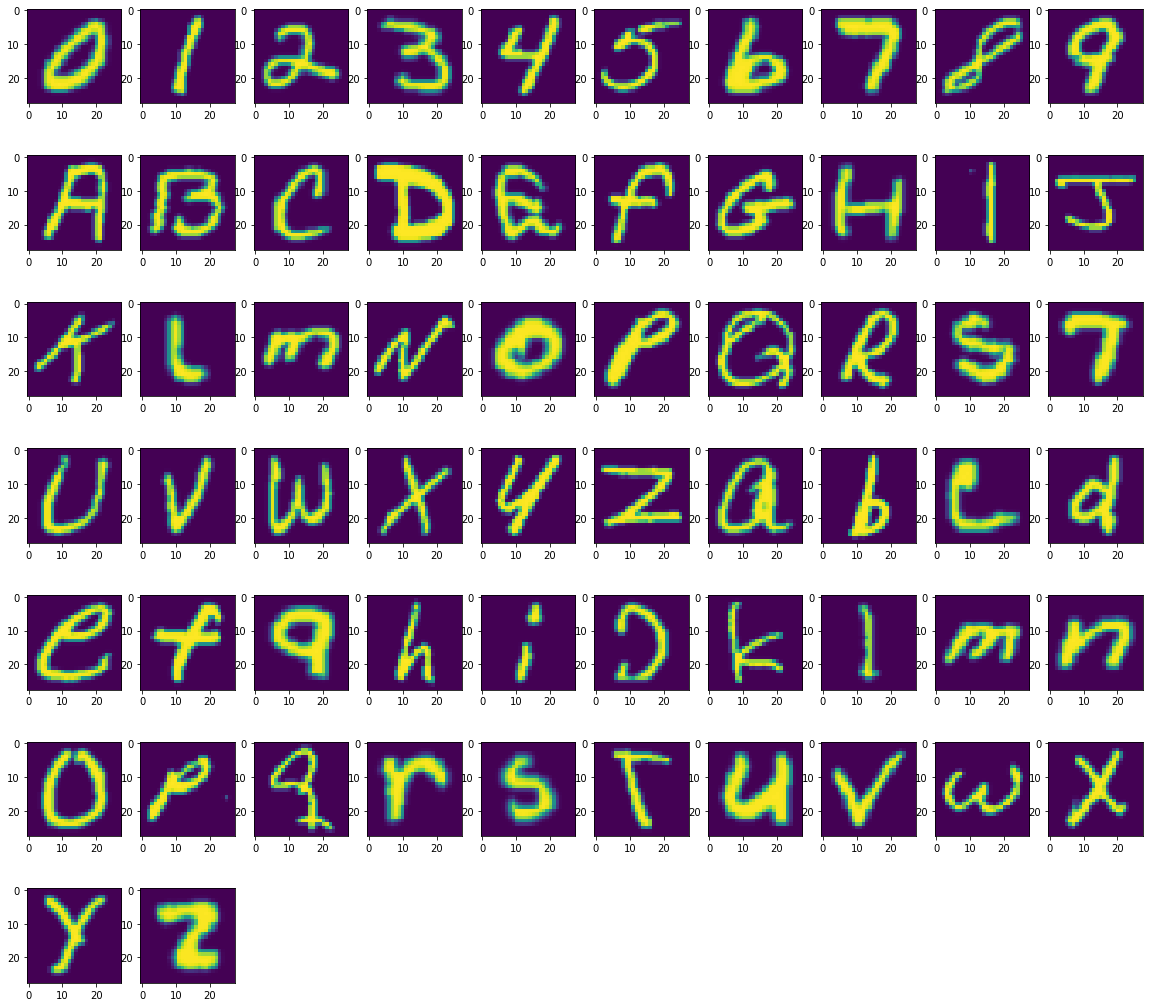

In [3]:
# Your code here
fig=plt.figure(figsize=(20, 40))
columns = 10
rows = 15
for i in range(1, 63):
    img = data[data.e==(i-1)].iloc[0,1:].to_numpy().reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [4]:
X, y = data.iloc[:,1:], data.iloc[:,0]
X=np.array(X)
y=np.array(y)
X_letra=X.reshape(X.shape[0],28,28)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

In [7]:
# SVC=SVC()
# # SVC.fit(X_train,y_train)
# DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()

In [8]:
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
precision_score(y_test,y_pred,average=None)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.62592344, 0.63547083, 0.81990881, 0.87613293, 0.8432304 ,
       0.835097  , 0.89378442, 0.94274194, 0.86      , 0.8655914 ,
       0.80952381, 0.82142857, 0.75537634, 0.92682927, 0.93333333,
       0.72759857, 0.96153846, 0.90243902, 0.64      , 0.80952381,
       0.66197183, 0.82198953, 0.73463687, 0.76623377, 0.63382353,
       0.7641196 , 0.8       , 0.8677686 , 0.75034483, 0.87888199,
       0.70741483, 0.59281437, 0.7797619 , 0.64102564, 0.66447368,
       0.77777778, 0.78470255, 0.82051282, 0.5       , 0.88022284,
       0.8481153 , 0.5       , 1.        , 0.8277027 , 0.79166667,
       0.73170732, 0.62962963, 0.40088106, 0.44444444, 0.88113695,
       0.        , 0.52631579, 0.75      , 0.87351779, 0.        ,
       0.81711409, 0.36363636, 0.52830189, 0.74137931, 0.6835443 ,
       0.1875    , 0.81481481])

In [9]:
RFC.score(X=X_test,y=y_test)

0.7917902428540726

* Try to do the same thing with lowercases.

In [16]:
# Your code here
X_lc=data[data.e>=36].drop(columns="e")
y_lc=data[data.e>=36].e
X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X_lc,y_lc,test_size=0.2)


In [17]:
RFC.fit(X_train_lc,y_train_lc)
y_pred_lc=RFC.predict(X_test_lc)
precision_score(y_test_lc,y_pred_lc,average=None)

array([0.80940594, 0.89308176, 0.91666667, 0.89866667, 0.91901408,
       0.87272727, 0.56989247, 0.88686131, 0.78787879, 0.8630137 ,
       0.88888889, 0.86206897, 0.97727273, 0.90488432, 0.91397849,
       0.84615385, 0.63636364, 0.91558442, 0.95061728, 0.85735736,
       0.88505747, 0.85714286, 0.89772727, 0.84210526, 0.8852459 ,
       0.96341463])

In [18]:
RFC.score(X=X_test_lc,y=y_test_lc)

0.8776792313377679

* Try to do the same thing with numbers.

In [13]:
# Your code here
X_num=data[data.e<10].drop(columns="e")
y_num=data[data.e<10].e
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num,y_num,test_size=0.2)


In [14]:
RFC.fit(X_train_num,y_train_num)
y_pred_num=RFC.predict(X_test_num)
precision_score(y_test_num,y_pred_num,average=None)

array([0.97809604, 0.98549618, 0.97591362, 0.96404682, 0.96654611,
       0.97238095, 0.98562444, 0.97894737, 0.97219559, 0.95614035])

In [15]:
RFC.score(X=X_test_num,y=y_test_num)

0.9737569060773481